In [52]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dstes
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
train_data = dsets.MNIST(root='./mnist',
                        train=True,
                        transform = transforms.ToTensor(),
                        download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5, 1.0, '5')

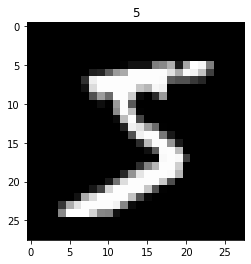

In [42]:
# plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title(f'{train_data.train_labels[0]}')

In [44]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True)

In [53]:
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255

In [47]:
test_y = test_data.test_labels.numpy().squeeze()[:2000] # convert to numpy array

In [48]:
class RNN(nn.Module):
    def __init__(self, input_size=28):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(
            input_size=input_size,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        r_out, (_, _) = self.rnn(x, None) # zero initial hidden layer
        out = self.out(r_out[:, -1, :])
        return out

In [49]:
rnn = RNN()
if torch.cuda.is_available():
    rnn.cuda()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [50]:
learning_rate = 0.01
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [56]:
epoch = 1
time_step = 28
input_size = 28
# training and testing
for epoch in range(epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for step,  (x, y) in enumerate(train_loader):
        inputs, labels = Variable(x.view(-1, 28, 28)), Variable(y) # reshape
        outputs = rnn(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if step % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, step + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 0.093
Finished Training
